# Modelo inicial
## Random Forest

Modelo inicial utilizando el set de datos original

In [1]:
import pandas as pd
import numpy as np
names = ['id_trn_ach', 'id_cliente', 'fecha', 'hora', 'valor_trx', 'class', 'seg_str', 'ocupacion', 'tipo_vivienda', 'nivel_academico', 'estado_civil', 'genero', 'edad', 'ingreso_rango']
df = pd.read_csv('set3.csv', names=names)

In [2]:
#print(df.head(10))
print('Filas: {}\nColumnas: {}\n'.format(df.shape[0], df.shape[1]))
print(df.isnull().sum())

Filas: 7490652
Columnas: 14

id_trn_ach               0
id_cliente               0
fecha                    0
hora                     0
valor_trx                0
class                    0
seg_str                  0
ocupacion           137927
tipo_vivienda      3230964
nivel_academico    1324842
estado_civil       1381618
genero              127532
edad                165074
ingreso_rango        59925
dtype: int64


In [7]:
df_t10 = df.dropna(thresh=10)
print('>> thresh 10 <<\n   Filas: {}\n   Columnas: {}\n'.format(df_t10.shape[0], df_t10.shape[1]))
df_t11 = df.dropna(thresh=11)
print('>> thresh 11 <<\n   Filas: {}\n   Columnas: {}\n'.format(df_t11.shape[0], df_t11.shape[1]))
df_t12 = df.dropna(thresh=12)
print('>> thresh 12 <<\n   Filas: {}\n   Columnas: {}\n'.format(df_t12.shape[0], df_t12.shape[1]))
df_t13 = df.dropna(thresh=13)
print('>> thresh 13 <<\n   Filas: {}\n   Columnas: {}\n'.format(df_t13.shape[0], df_t13.shape[1]))

>> thresh 10 <<
   Filas: 7361172
   Columnas: 14

>> thresh 11 <<
   Filas: 7344712
   Columnas: 14

>> thresh 12 <<
   Filas: 7102130
   Columnas: 14

>> thresh 13 <<
   Filas: 5928802
   Columnas: 14



In [8]:
del df_t10
del df_t11
del df_t13

In [9]:
df1 = df_t12.fillna(value=df_t12.mode().iloc[0])
print('Filas: {}\nColumnas: {}\n'.format(df1.shape[0], df1.shape[1]))
print(df1.isnull().sum())

Filas: 7102130
Columnas: 14

id_trn_ach         0
id_cliente         0
fecha              0
hora               0
valor_trx          0
class              0
seg_str            0
ocupacion          0
tipo_vivienda      0
nivel_academico    0
estado_civil       0
genero             0
edad               0
ingreso_rango      0
dtype: int64


In [10]:
del df_t12
del df

In [11]:
from sklearn.model_selection import train_test_split

x = df1.drop('class', axis = 1)
y = df1['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=548, stratify=y)

In [12]:
x_train_set = list()
y_train_set = list()
for g, df in x_train.groupby(np.arange(len(x_train)) // 400000):
    x_train_set.append(df)
    #print(df.shape)
    
for g, df in y_train.groupby(np.arange(len(y_train)) // 400000):
    y_train_set.append(df)
    #print(df.shape)
    
print(len(x_train_set))

15


In [13]:
del x_train
del y_train

In [14]:
from sklearn.ensemble import RandomForestClassifier
from functools import reduce

clf_set = list()
n_it = 1
for x_train, y_train in zip(x_train_set, y_train_set):
    clf = RandomForestClassifier(n_jobs=3, random_state=895)
    clf.fit(x_train, y_train)
    print('Iteration #{0:2d}'.format(n_it))
    print('rf score: {0:.4f}'.format(clf.score(x_test, y_test)))
    print(' '.join(['{0:.2f}'.format(x) for x in clf.feature_importances_]))
    clf_set.append(clf)
    n_it += 1

def combine_rfs(rf_a, rf_b):
    rf_a.estimators_ += rf_b.estimators_
    rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a

rf_combined = reduce(combine_rfs, clf_set)
# the combined model scores better than *most* of the component models
print('rf combined score: {0:.4f}'.format(rf_combined.score(x_test, y_test)))

/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Iteration # 1
rf score: 0.2903
0.12 0.14 0.11 0.13 0.21 0.02 0.03 0.02 0.04 0.02 0.02 0.10 0.05
Iteration # 2
rf score: 0.2907
0.12 0.14 0.11 0.13 0.20 0.02 0.03 0.02 0.04 0.02 0.02 0.09 0.05
Iteration # 3
rf score: 0.2911
0.12 0.14 0.11 0.13 0.20 0.02 0.03 0.02 0.04 0.02 0.02 0.09 0.05
Iteration # 4
rf score: 0.2908
0.12 0.14 0.11 0.13 0.21 0.02 0.03 0.02 0.04 0.02 0.02 0.09 0.05
Iteration # 5
rf score: 0.2917
0.12 0.14 0.11 0.13 0.20 0.02 0.03 0.02 0.04 0.02 0.02 0.09 0.05
Iteration # 6
rf score: 0.2881
0.12 0.14 0.11 0.13 0.21 0.02 0.03 0.02 0.04 0.02 0.02 0.09 0.05
Iteration # 7
rf score: 0.2910
0.12 0.14 0.11 0.13 0.20 0.02 0.03 0.02 0.04 0.03 0.02 0.09 0.05
Iteration # 8
rf score: 0.2888
0.12 0.14 0.11 0.13 0.21 0.02 0.03 0.02 0.04 0.03 0.02 0.09 0.05
Iteration # 9
rf score: 0.2882
0.12 0.14 0.11 0.13 0.20 0.02 0.03 0.02 0.04 0.03 0.02 0.09 0.05
Iteration #10
rf score: 0.2923
0.12 0.14 0.11 0.13 0.21 0.02 0.03 0.02 0.04 0.02 0.02 0.09 0.05
Iteration #11
rf score: 0.2910
0.12 0.14

In [15]:
predict = rf_combined.predict(x_test)

In [16]:
import scikitplot as skplt
from sklearn import metrics

print("\n#### Accuracy DT ####")
print(metrics.accuracy_score(y_test, predict))
print("\n#### Matriz de Confusion DT ####")
print(metrics.confusion_matrix(y_test, predict))  
print("\n#### Metricas DT ####")
print(metrics.classification_report(y_test, predict)) 


#### Accuracy DT ####
0.38015989569326386

#### Matriz de Confusion DT ####
[[ 65474   7062   8605   3553   4181    592    192  14607   5729  18236
      58    718     19    258]
 [ 27541  30628   7053   3728   4750    417    113   9693   6217  28550
     253    484     20    214]
 [ 22020   5334  35684   3016   4043    409     88  13265   6380  19641
      76    447     21    172]
 [ 21623   7221   6341  20195   6779    568    193  14780   8878  37592
     289    980     28    170]
 [ 13315   3619   5391   3522  68382    349     86   7943   5382  26307
     200    365     24    104]
 [ 11692   2199   4034   2136   2165   9742     86   9103   3436  13591
      61    264     43     76]
 [ 15343   3030   3108   2219   2262    291   2531   8110   3680  12284
      31    458     10    107]
 [ 14529   3765   4193   3731   5552    584    134  54188  11223  39653
     176    655     24     66]
 [  5505   2582   2887   2834   4301    246     57  11764  46884  68698
      93    343     20     

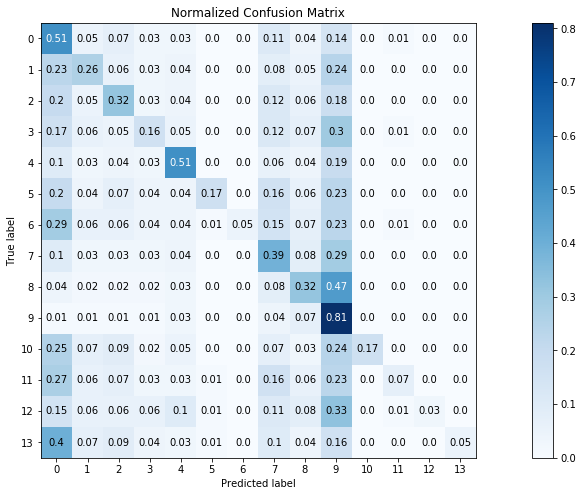

In [17]:
plot = skplt.metrics.plot_confusion_matrix(y_test, predict, normalize=True, title='', figsize=(20,8))